<a href="https://colab.research.google.com/github/SangHee33/Sanghee2/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%BC%80%EB%9D%BC%EC%8A%A41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

p. 50~86

#03. 케라스(Keras)

##01 딥러닝 준비
###1-1 주요 용어
####1-1-1 하이퍼파라미터(hyper-parameter)
- 하이퍼 파라미터: 사용자가 직접 설정해야 하는 값
 - 별도로 설정하지 않으면 기본값 자동 적용
- 하이퍼 파라미터 튜닝(tuning): 하이퍼 파라미터의 값을 조절하는 것

####1-1-2 과소적합 vs. 과대적합(underfitting vs. overfitting)
- 예측 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어진 경우, 예측 성능이 현저히 떨어짐
- 과소적합: 모델이 충분히 학습되지 않아 예측 성능이 떨어진 상태
- 과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
- 훈련 데이터를 잘 구성해야 함
 - 예측 데이터와 분포가 동일하게 구성
 - 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소
- 훈련 데이터의 일부를 검증 데이터로 활용

####1-1-3 에포크(epoch)
- 딥러닝: 데이터셋을 학습하는 과정을 여러 번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정
- 1 epoch: 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)
 - 과소적합 -> 에포크를 늘려서 다시 학습
 - 과대적합 -> 에포크를 줄여서 최적 구간에서 학습을 조기에 종료

####1-1-4 손실함수(loss function)
- 예측 값과 정답 값의 차이 또는 오차(Error)
- 오차: 딥러닝 모델의 출력 값과 실제 값과의 차이
1. 이진 분류(binary classification)
 - binary_crossentropy 손실함수 사용
 - 출력층의 활성화 함수(activation function)로 'sigmoid' 사용
2. 다중 분류(multi-class classification)
 - 원핫 벡터인 경우: categorical_crossentropy 손실함수 사용
 - 레이블 값(예시:0,1,2,3,...)인 경우: sparse_categorical_crossentropy 손실함수 사용
 - 출력층의 활성화 함수로 'softmax' 사용
- 회귀 모델 : mean_squared_error, mean absolute_error, huber

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

####1-1-5 경사하강법(gradient descent)
- 딥러닝 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

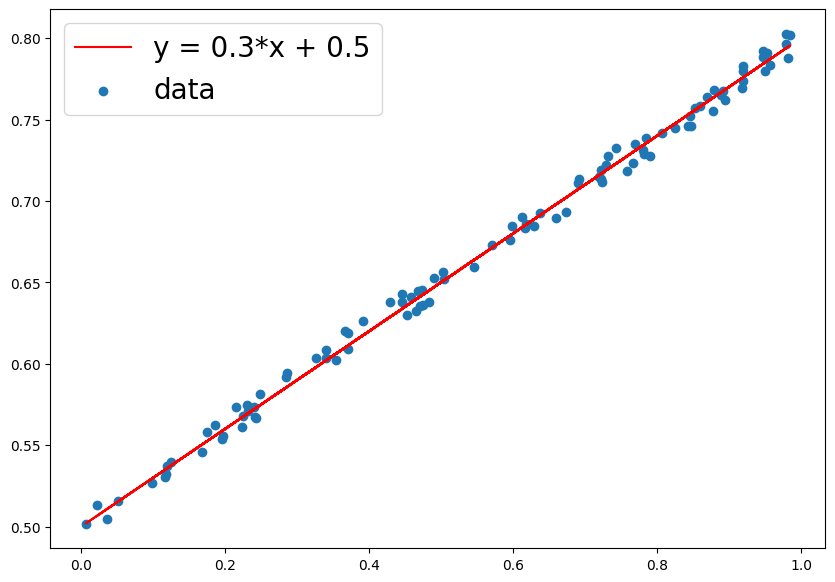

w:0.3,b:0.5


In [2]:
# 단순 선형회귀 수식(y=wx+b)이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.74809, b = 0.34827 error = 6.53173
 5 w = 0.64033, b = 0.29815 error = 0.51763
10 w = 0.59088, b = 0.32712 error = 0.37961
15 w = 0.54873, b = 0.35222 error = 0.27856
20 w = 0.51266, b = 0.37370 error = 0.20451
25 w = 0.48177, b = 0.39210 error = 0.15024
30 w = 0.45534, b = 0.40784 error = 0.11048
35 w = 0.43270, b = 0.42132 error = 0.08135
40 w = 0.41333, b = 0.43286 error = 0.06000
45 w = 0.39675, b = 0.44273 error = 0.04435
50 w = 0.38255, b = 0.45118 error = 0.03289
55 w = 0.37040, b = 0.45842 error = 0.02449
60 w = 0.36000, b = 0.46462 error = 0.01833
65 w = 0.35110, b = 0.46992 error = 0.01382
70 w = 0.34348, b = 0.47446 error = 0.01052
75 w = 0.33695, b = 0.47834 error = 0.00810
80 w = 0.33137, b = 0.48167 error = 0.00632
85 w = 0.32659, b = 0.48452 error = 0.00502
------------------------------------------------------------
86 w = 0.3, b = 0.5 error = 0.00481


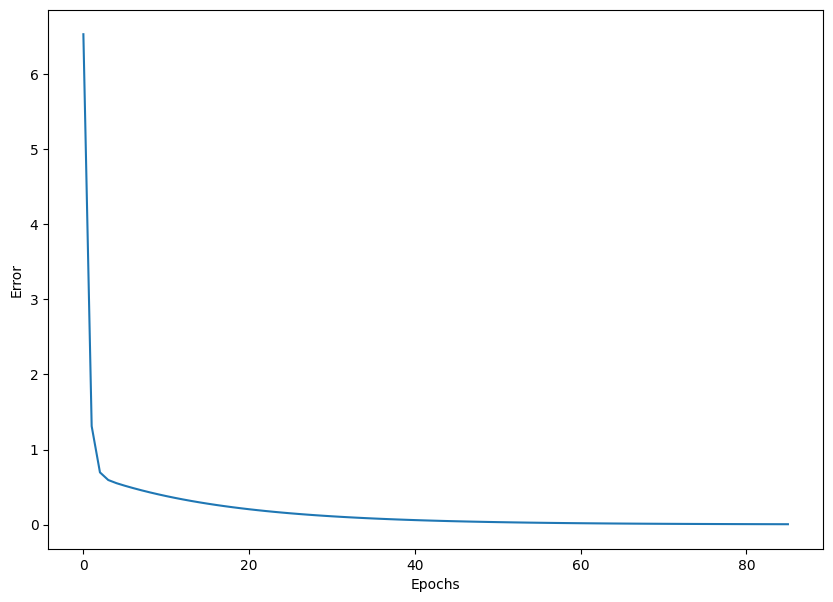

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

###1-2 딥러닝 프로세스
####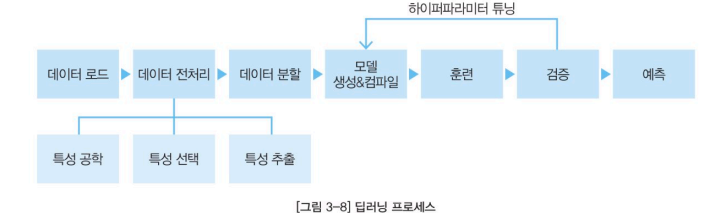

####1-2-1 데이터 전처리
- 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계

####1-2-2 모델 생성
- 모델의 구조를 정의하고 생성하는 단계
- 순차적인 구조의 모델 : Sequential API로 구현
- 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델 : Functional API 혹은 Model Subclassing 방법으로 구현

####1-2-3 모델 컴파일
- 생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의
- 모델 인스턴스에 compile() 메소드를 적용하고 여러 가지 속성 값을 설정하는 단계

####1-2-4 모델 훈련
- 모델을 훈련하는 단계
 - fit() 함수에 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달
 - 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등을 지정

####1-2-5 모델 검증
- 훈련이 완료된 모델을 검증하는 단계
- 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 반복

####1-2-6 모델 예측
- 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환

##02 단순 신경망 훈련

###2-1 선형회귀
- 회귀분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
- 단순선형회귀 모형: 하나의 X가 Y에 미치는 영향 추정, 1차 함수 관계
 - y = wx + b
  - X: 독립변수
  - Y: 종속변수
  - w: 가중치
  - b: 편향

###2-2 뉴런(Neuron)
- 신경망 : 여러 개의 레이어(layer)를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성
- 뉴런(노드) : 인공 신경망 모델을 구성하는 하나의 신경
 - 뉴런의 내부에는 가중치가 존재
 - 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트
- 그래디언트 : 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과

###2-3 Dense 레이어
- Dense 레이어: 심층 신경망 모델을 구성하는 가장 기본 레이어
 - 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층(Fully Connected Layer)라고 불림
 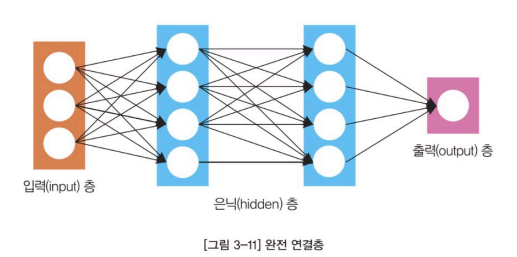

 - 4개의 Dense 레이어로 구성된 모델
 - 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개
 - 입력 레이어는 3개의 뉴런, 출력 레이어는 1개의 뉴런
 - 모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있어 완전연결층이라고 정의함

In [5]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

###2-4 데이터셋 만들기

In [6]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


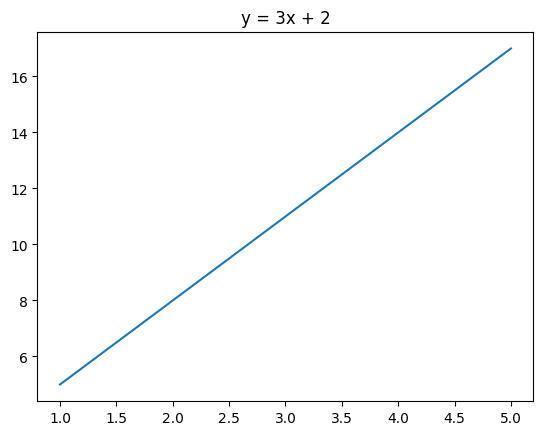

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

###2-5 Sequential API
####2-5-1 모델 구조
- 리스트형
 - sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력
- add() 함수로 레이어 추가
 - 여러 개의 층 추가하려면 add 함수 반복해서 여러번 사용

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

####2-5-2 입력 데이터 형태
- Sequential API를 사용하여 모델을 구성할 때 반드시 첫 번째 층은 input_shape 매개변수(투플 혹은 리스트 형태)를 지정해야함


In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape=(150,4)인 경우
  # shape(150,4) : 150개 샘플에 대해 4개의 입력 변수 존재
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])

####2-5-3 단순선형회귀 모델 정의
- 디폴트는 use_biase=True -> 상수항 b 포함

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

###2-6 모델 요약

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###2-7 컴파일
- 모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 평가지표(metrics) 등을 정의

In [13]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [15]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [16]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

###2-8 훈련

In [17]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 467ms/step - loss: 79.4219 - mae: 8.3878
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 46.4113 - mae: 6.4547
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 27.1735 - mae: 4.9789
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 15.9618 - mae: 3.8521
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 9.4274 - mae: 2.9917


In [18]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 426ms/step - loss: 272.6251 - mae: 15.2788
Epoch 2/1200
1/1 [==============================] - 0s 13ms/step - loss: 158.9110 - mae: 11.6919
Epoch 3/1200
1/1 [==============================] - 0s 11ms/step - loss: 92.6438 - mae: 8.9536
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 54.0263 - mae: 6.8632
Epoch 5/1200
1/1 [==============================] - 0s 9ms/step - loss: 31.5217 - mae: 5.2673
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 18.4069 - mae: 4.0489
Epoch 7/1200
1/1 [==============================] - 0s 8ms/step - loss: 10.7639 - mae: 3.1187
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 6.3098 - mae: 2.4085
Epoch 9/1200
1/1 [==============================] - 0s 8ms/step - loss: 3.7138 - mae: 1.8663
Epoch 10/1200
1/1 [==============================] - 0s 13ms/step - loss: 2.2008 - mae: 1.4523
Epoch 11/1200
1/1 [==============================] 

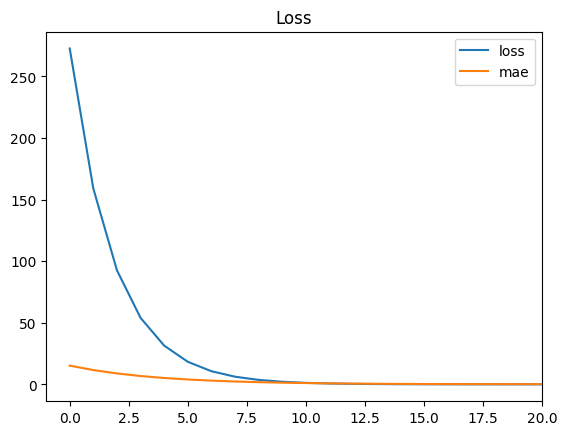

In [19]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

###2-9 검증

In [20]:
model.evaluate(x,y)

1/1 [==============================] - 0s 96ms/step - loss: 2.7761e-05 - mae: 0.0045


[2.7760670491261408e-05, 0.0045223236083984375]

###2-10 예측

In [21]:
model.predict([10])

1/1 [==============================] - 0s 67ms/step


array([[32.02186]], dtype=float32)

##03 심층 신경망으로 이미지 분류

###3-1 케라스 내장 데이터셋 로드
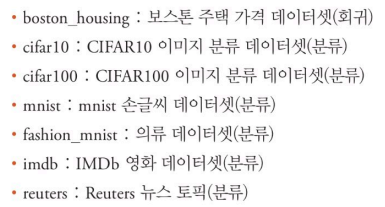

In [22]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [23]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


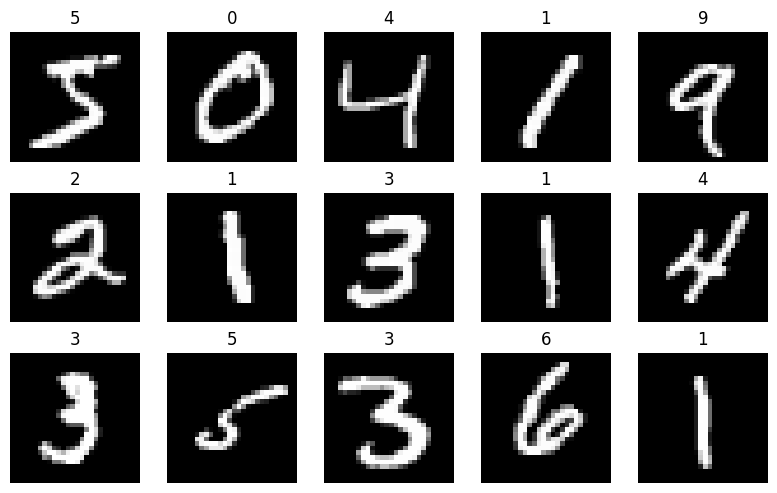

In [25]:
## 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

###3-2 데이터 전처리
- 정규화는 데이터의 전체 범위를 0 ~ 1 사이의 값을 가짐
 - 모델이 학습하는 경우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴함
 - local optimum(국소 최적)에 빠지는 현상을 방지

In [26]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [27]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [28]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [29]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

###3-3 Flatten 레이어
- 정규화를 하더라도 원본 배열의 형태는 그대로 유지됨
- 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없음 -> 이미지 데이터를 1차원으로 전처리 해야 함

In [30]:
print(f'변경 전 shape:{x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


In [31]:
# 다차원 데이터를 1차원으로 펼쳐주는 방법
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후:(60000, 784)


###3-4 활성화 함수
- 활성화 함수(Activation Function) : 입력을 비선형 출력으로 변환해주는 함수
 - 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함
 - 자주 사용되는 활성화 함수로는 시그모이드(Sigmoid), 하이퍼볼릭 탄젠트(Hyperbolic Tangent 혹은 tanh), ReLU(Rectified Unit), Leaky ReLU 등
 - 텐서플로 케라스 레이어에 활성화 함수를 적용하고 싶다면 activation 매개변수에 활성화 함수명을 지정

In [33]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [34]:
# Dense 레이어와 relu 활성호 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

###3-5 입력과 출력

In [35]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [36]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

###3-6 손실함수
- 이진 분류기(binary classifier)
 - 출력층의 노드 개수 1개: activation = 'sigmoid' / loss = 'binary_crossentropy'     
 - 출력층 노드 개수 2개: activation = 'softmax' / loss = 'categorical_crossentropy', 'sparse_categorical_crossentropy'

In [37]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [38]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

###3-7 옵티마이저
- 손실을 낮추기 위해서 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법

In [39]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

###3-8 평가지표
- 분류 모델 평가지표 : accuracy, auc, precision, recall

In [40]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [41]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###3-9 훈련

In [42]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2317 - accuracy: 0.9298 - val_loss: 0.1249 - val_accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0925 - accuracy: 0.9718 - val_loss: 0.0811 - val_accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0646 - accuracy: 0.9797 - val_loss: 0.0812 - val_accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0497 - accuracy: 0.9848 - val_loss: 0.0775 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0387 - accuracy: 0.9872 - val_loss: 0.0817 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0898 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0825 - val_accuracy:

###3-10 평가

In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9794
검증 셋 정확도: 0.9793999791145325


###3-11 예측

In [44]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [45]:
# 예측 결과 출력
predictions[0]

array([8.9103519e-10, 5.0473705e-07, 6.2933716e-09, 5.8699180e-07,
       6.2755567e-10, 3.6367636e-09, 5.3655176e-13, 9.9999732e-01,
       3.2288165e-09, 1.5614544e-06], dtype=float32)

In [46]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


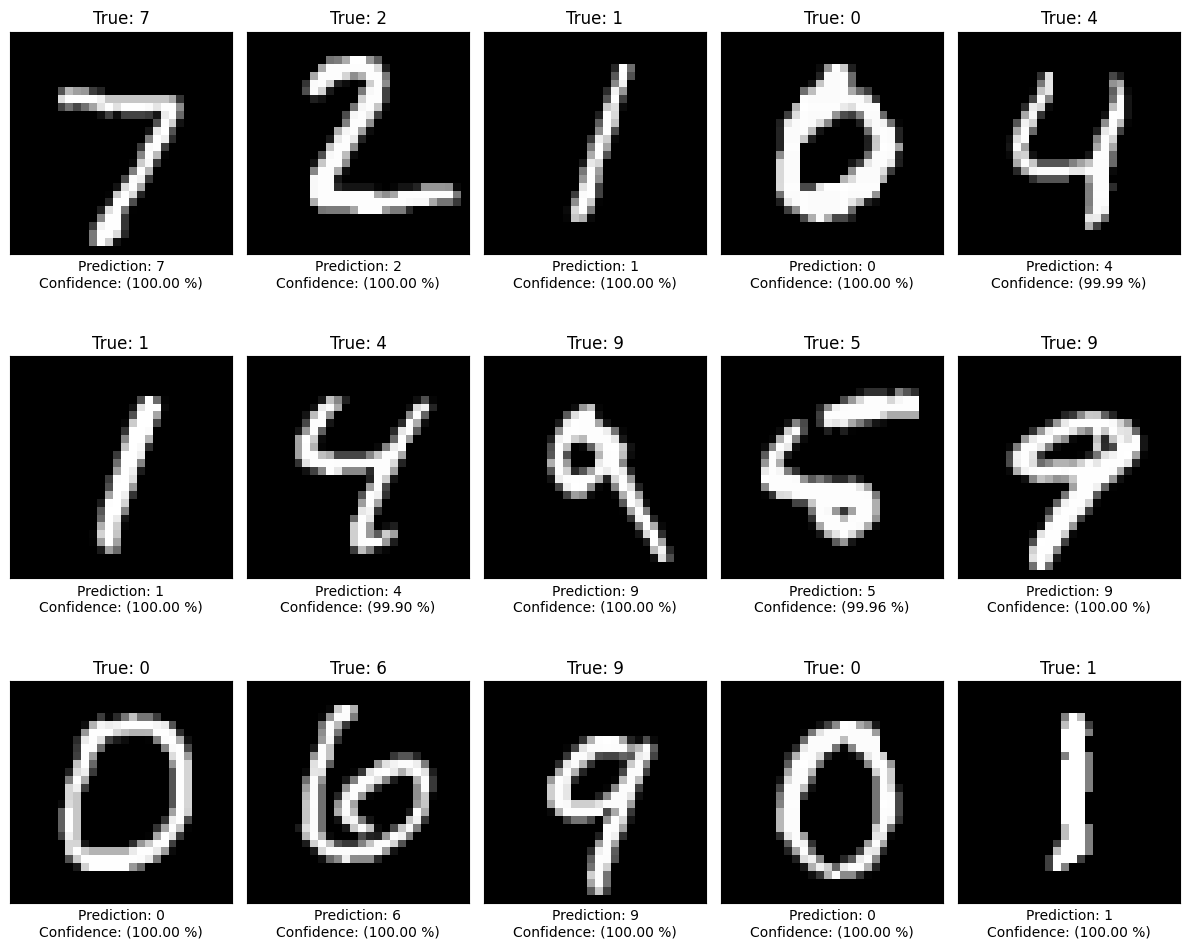

In [47]:
## 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()